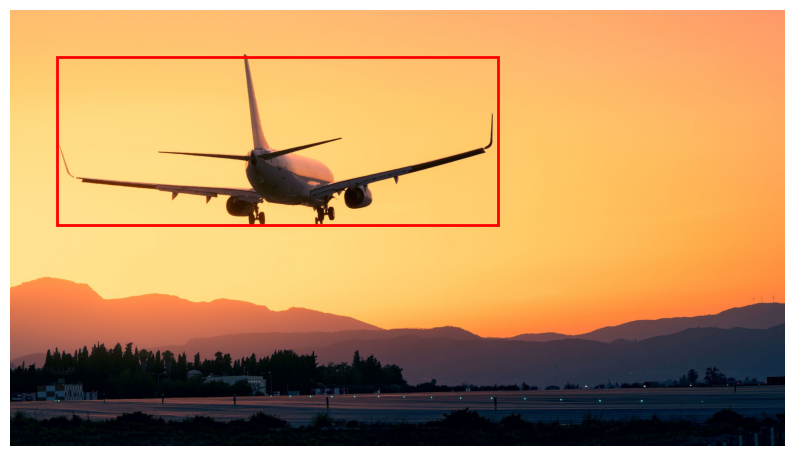

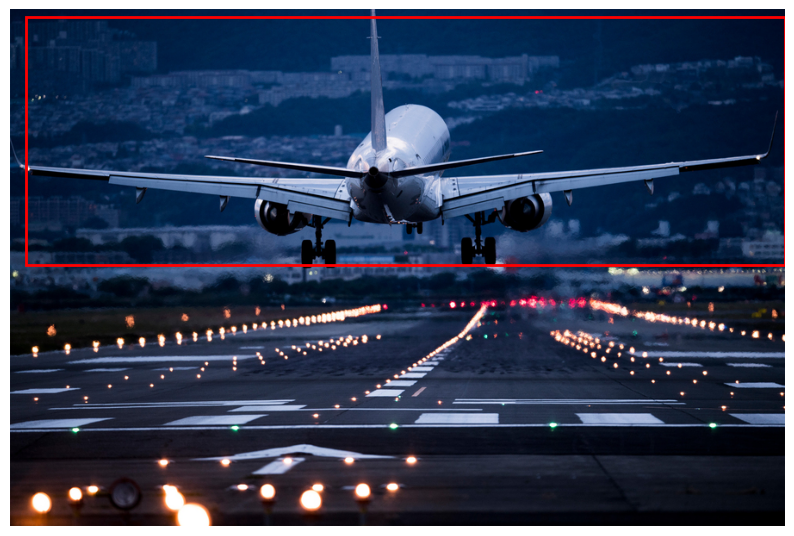

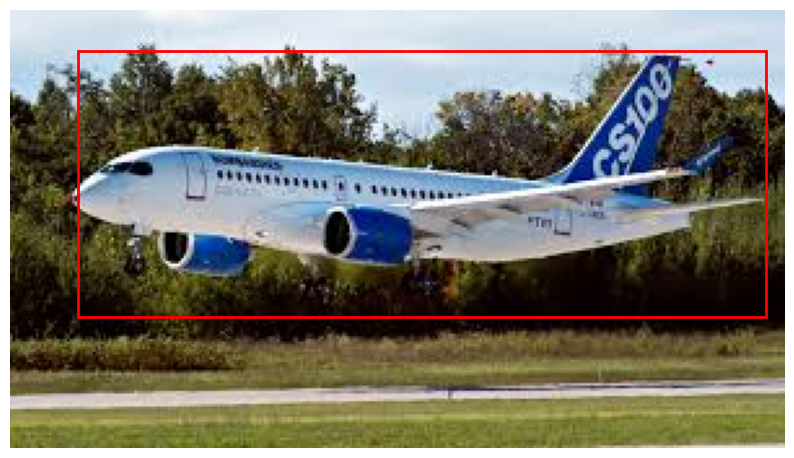

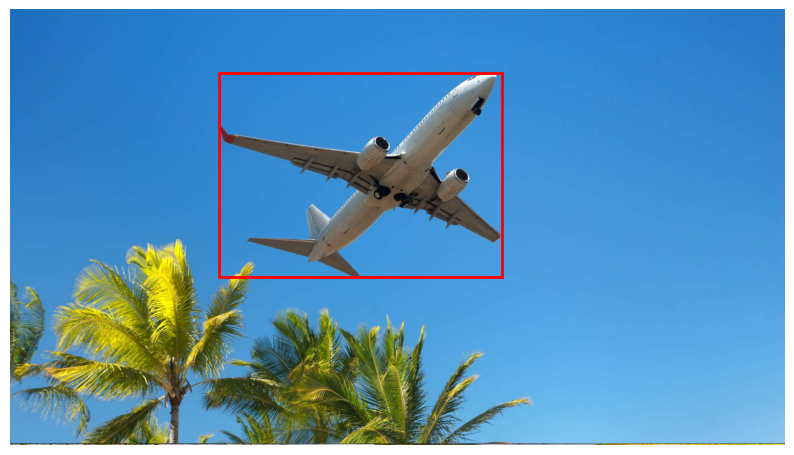

In [7]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

image_folder = "/content/images"
label_folder = "/content/labels"

image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))]

num_images_to_sample = min(5, len(image_files))
sample_images = random.sample(image_files, num_images_to_sample)

def read_yolo_annotation(label_file):
    with open(label_file, 'r') as file:
        annotations = []
        for line in file:
            parts = line.strip().split()
            class_id, x_center, y_center, width, height = map(float, parts)
            annotations.append([class_id, x_center, y_center, width, height])
    return annotations

def visualize_bboxes(image_path, annotations):
    img = Image.open(image_path)
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(img)

    for ann in annotations:
        class_id, x_center, y_center, width, height = ann


        xmin = (x_center - width / 2) * img.width
        ymin = (y_center - height / 2) * img.height
        xmax = (x_center + width / 2) * img.width
        ymax = (y_center + height / 2) * img.height

        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.axis('off')
    plt.show()
for image_name in sample_images:

    image_path = os.path.join(image_folder, image_name)
    label_file = os.path.join(label_folder, image_name.replace('.jpg', '.txt').replace('.png', '.txt'))
    if os.path.exists(label_file):

        annotations = read_yolo_annotation(label_file)
        visualize_bboxes(image_path, annotations)
    else:
        print(f"Label file for {image_name} not found!")
